# Project

In [1]:
import mltools as ml
import numpy as np

np.random.seed(0)

X = np.genfromtxt('data/X_train.txt', delimiter=None)
Xtest = np.genfromtxt('data/X_test.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X, Y = ml.shuffleData(X, Y)

In [2]:
print(X.shape)
print(Xtest.shape)

(100000, 14)
(100000, 14)


In [4]:
class dummy(ml.classifier):
    def set(self, P):
        self.Pr = P
        self.classes = np.array([0, 1])
    def predictSoft(self, X):
        return self.Pr

In [5]:
# Xtr, Ytr = X[:numData,:], Y[:numData]
# Xva, Yva = X[numData:numData*2,:], Y[numData:numData*2]
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, .60)

In [12]:
def toKaggle(filename,prSoft):
    fh=open(filename,'w')# open file for upload
    fh.write('ID,Target\n')# output header line
    for i,yi in enumerate(prSoft[:,1].ravel()):
        fh.write('{},{}\n'.format(i+1,yi))# output each prediction
    fh.close()# close the file

In [ ]:
def createAndKaggleBoostedTree(Xti, Xvi, Yti, Yvi, Xtest, depth, minLeaf, nFeatures, numBoosts):
    ens = dummy()
    
    mu = np.mean(Yti)
    YtrCopy = np.copy(Yti) - mu

    totalXtrBoost = np.zeros((Xti.shape[0], 2)) + mu
    totalXvaBoost = np.zeros((Xvi.shape[0], 2)) + mu
    totalTestBoost = np.zeros((Xtest.shape[0], 2)) + mu
    
    alpha = 1.0
    
    for i in range(numBoosts):
        learner = ml.dtree.treeRegress()
        learner.train(Xti, YtrCopy, maxDepth=depth, minLeaf=minLeaf, nFeatures = nFeatures)
#         learner = ml.knn.knnRegress()
#         learner.train(XtrTest, YtrCopy, K=1)
#         learner = ml.linearC.linearClassify(Xti, YtrCopy, reg=1e-3, initStep=.1, stopIter=1000)
        
        YtrCopy -= learner.predict(Xti)
        totalXtrBoost[:,1] += learner.predict(Xti)
        totalXvaBoost[:,1] += learner.predict(Xvi)
        totalTestBoost[:,1] += learner.predict(Xtest)
        
        ens.set(totalXvaBoost /(i+1.))
        print('Tree Boost Num {}/{} AUC: {}'.format(i, numBoosts, ens.auc(Xvi, Yvi)))

    ens.set(totalXtrBoost)
    print('Training Error:', ens.auc(Xti, Yti))
    ens.set(totalXvaBoost)
    print('Validation Error:', ens.auc(Xvi, Yvi))
    
    toKaggle('BoostVal.csv', totalXvaBoost)
    toKaggle('BoostTest.csv', totalTestBoost)
    return (ens.auc(Xti, Yti), ens.auc(Xvi, Yvi))

In [10]:
# bags = list(range(2, 15))
# aucs = [None] * len(bags)

# for i in range(len(bags)):
#     iBag = bags[i]
#     print("DEPTH {}".format(iBag))
# #     Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr, Ytr, folds, iFold)
#     aucs[i] = createAndPrintBoostedTree(Xtr, Xva, Ytr, Yva, iBag, 50, 8, 18)

BAG 2
Tree 0 AUC: 0.5910829928310009
Tree 1 AUC: 0.6227464542457427
Tree 2 AUC: 0.6368989655204359
Tree 3 AUC: 0.6477558161009699
Tree 4 AUC: 0.6504713118278904
Tree 5 AUC: 0.6527217790865102
Tree 6 AUC: 0.6597528261823153
Tree 7 AUC: 0.6602931809737173
Tree 8 AUC: 0.6636804157415557
Tree 9 AUC: 0.6647269171999971
Tree 10 AUC: 0.6663968439890408
Tree 11 AUC: 0.6674595973549128
Tree 12 AUC: 0.6691314071981127
Tree 13 AUC: 0.6703118091874148
Tree 14 AUC: 0.6720336287367266
Tree 15 AUC: 0.6722397919904387
Tree 16 AUC: 0.6723846666117463
Tree 17 AUC: 0.6724282997062122
Training Error: 0.6800995377271585
Validation Error: 0.6724282997062122
BAG 3
Tree 0 AUC: 0.6334810171555212
Tree 1 AUC: 0.6516798196821704
Tree 2 AUC: 0.6613103461388581
Tree 3 AUC: 0.6674259143795754
Tree 4 AUC: 0.6691482978752019
Tree 5 AUC: 0.6722142259623032
Tree 6 AUC: 0.6744213552629802
Tree 7 AUC: 0.6765359003748348
Tree 8 AUC: 0.6783075993822152
Tree 9 AUC: 0.6781257592577586
Tree 10 AUC: 0.6788426874415733
Tree 11 

Tree 16 AUC: 0.7035227614593746
Tree 17 AUC: 0.7038748080639201
Training Error: 0.8770860893322739
Validation Error: 0.7038748080639201


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[None, None, None, None, None, None, None, None, None, None, None, None, None]


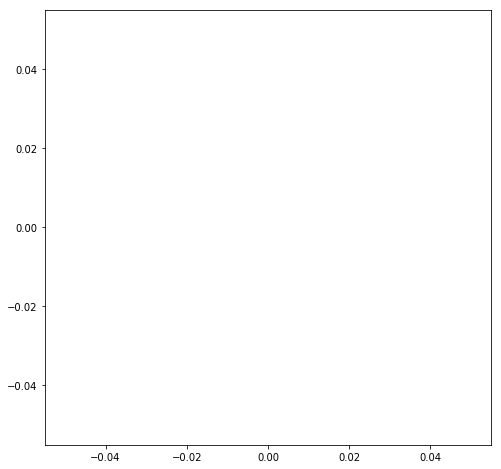

SO far, for bags: 9 has training .81, and 11, 12, 13 have training .87, all with validation as .7


In [16]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(bags, aucs, 'r-', lw=4)
plt.show()

print("SO far, for depth with 8 nodes and 50 min parents: 9 has training .81, and 11, 12, 13 have training .87, all with validation as .7")

In [ ]:
# chosenDepth = [9, 11, 12, 13]
# minParents = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# aucsT = [None] * len(minParents)
# aucsV = [None] * len(minParents)

# for depth in chosenDepth:
#     print("CHOSEN DEPTH {}".format(depth))
#     for i in range(len(minParents)):
#         minParent = minParents[i]
#         print("MINPARENT {}".format(minParent))
#     #     Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr, Ytr, folds, iFold)
#         aucsT[i], aucsV[i] = createAndPrintBoostedTree(Xtr, Xva, Ytr, Yva, depth, minParent, 8, 18)


In [ ]:
print("Min parents of 10 has t:.84, v:.702. 100 has t:.79, v:.704. P of 70 has t:.816, v:.703")

In [13]:
createAndKaggleBoostedTree(Xtr, Xva, Ytr, Yva, Xtest, depth=11, minLeaf=70, nFeatures=8, numBoosts=18)

Tree 0 AUC: 0.678496955095887
Tree 1 AUC: 0.6888924241533291
Tree 2 AUC: 0.6916027847818662
Tree 3 AUC: 0.6938470985132543
Tree 4 AUC: 0.6979284445018533
Training Error: 0.776932033104048
Validation Error: 0.6979284445018533


(0.500586443358384, 0.6979284445018533)